# 군집화(Clustering)
- 비지도 학습으로 정답없이 특징만 가지고, 보유한 데이터로 모델을 구현

In [88]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [89]:
import pandas as pd
df = pd.read_csv("../Data/student_kmeans.csv")
df.head() 

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


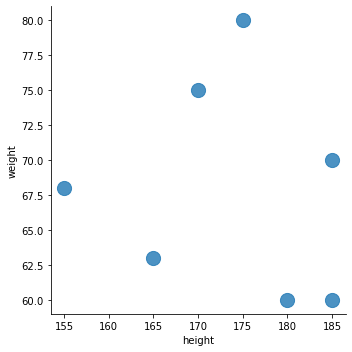

In [90]:
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':200}
)
plt.show()

---
### k-means 군집화

In [91]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [92]:
from sklearn.cluster import KMeans
data_points = df.values
kmeans = KMeans(
    n_clusters=3   # clustering을 3번 할거임
).fit(data_points)

In [93]:
# 각 군집의 중심위치
kmeans.cluster_centers_ #cluster_centers_ 이렇게 언더바가있는것을 시스템에서 만든것이다.

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

In [94]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


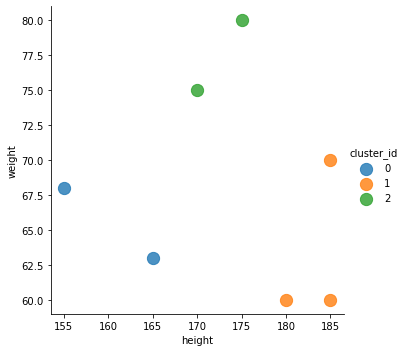

In [95]:
# 세 분류나눈것을 시각화 하기
sns.lmplot(
    'height',
    'weight',
    data =df,
    fit_reg=False,
    scatter_kws={'s':150},
    hue='cluster_id'
)

---
# iris 군집화 비교

In [109]:
iris = pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
# Name을 숫자로 변형하기
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, "Iris-virginica":2})


In [111]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


k-Means 군집화

In [112]:
iris2 =iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [113]:
data_points =iris2.values
kmeans =KMeans(n_clusters=3).fit(data_points)

In [114]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [115]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [116]:
iris['cluster_id'] =kmeans.labels_
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


# 시각화 해보기
cluster id의 일련번호가 틀리게 나올 수 있으므로 시각화를 통한 확인이 필요

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


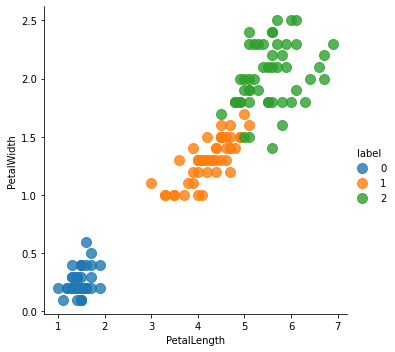

In [117]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data =iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='label'
)
plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


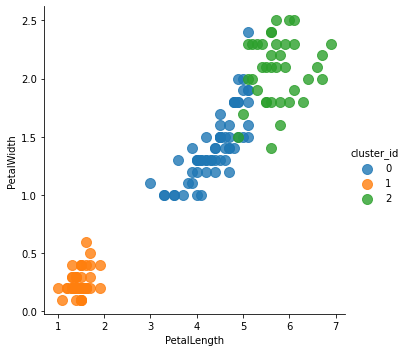

In [118]:
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data =iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)
plt.show()

In [123]:
# cluster_id : 0 -> 2, 1 ->0, 2->1
iris['cluster_id2'] =iris['cluster_id'].map({0:1, 1:0,2:2})
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id,cluster_id2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0


In [124]:
sum(iris['label']==iris['cluster_id2']) / len(iris)

0.8933333333333333

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333